In [279]:
from EOF_manage import *
from basic_op_jup import *
from I_O_manage import *
from KMEAN_manage import *
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cdo import Cdo
import pandas as pd
import cartopy.crs as ccrs

cdo=Cdo()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [280]:
dataset_0, dataset_names = input_interface('I_all_multi.json')
dataset = dataset_0.rolling(time=15, center=True).mean().dropna("time")

### Day of year serie

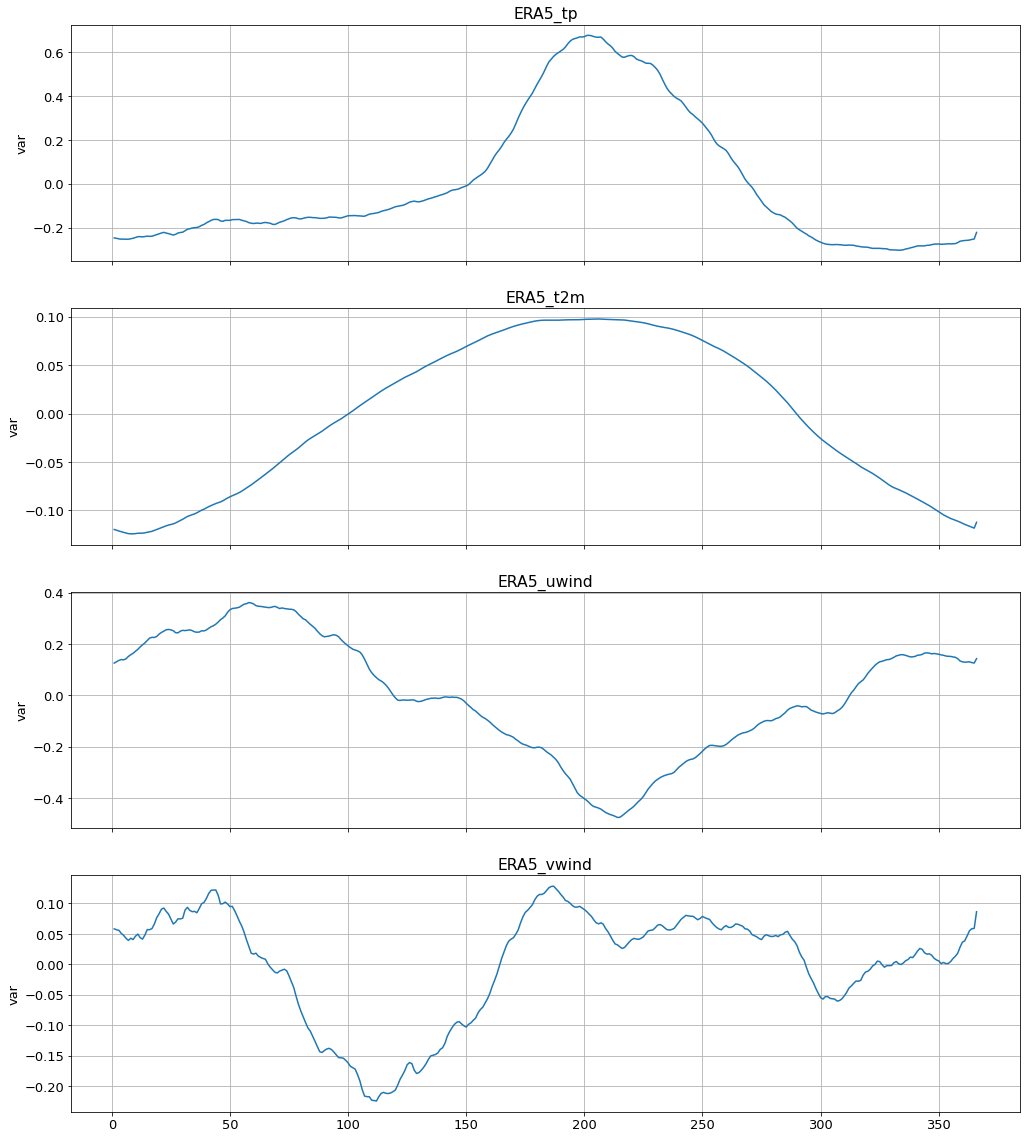

In [281]:
dataset_doy = dataset.groupby('time.dayofyear').mean().rename(dayofyear = 'time')

fig, axs = plt.subplots(len(dataset_names),1, figsize = (17,len(dataset_names)*5), sharex = True, sharey = False)

for i in range(len(dataset_names)):
    axs[i].set_title(dataset_names[i])    
    axs[i].plot(getattr(dataset_doy,dataset_names[i]).time, getattr(dataset_doy,dataset_names[i]).mean(['lat','lon']), label = dataset_names[i] )
    axs[i].grid()
    axs[i].set_ylabel('var')

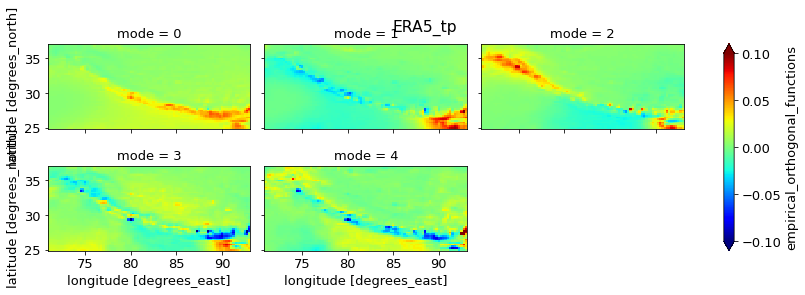

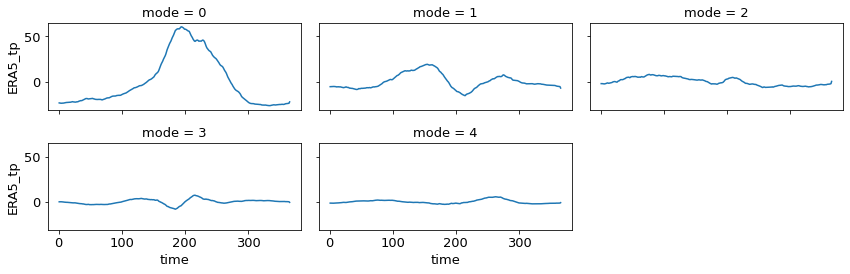

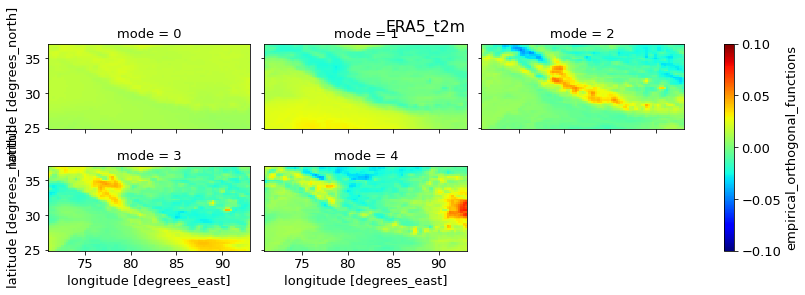

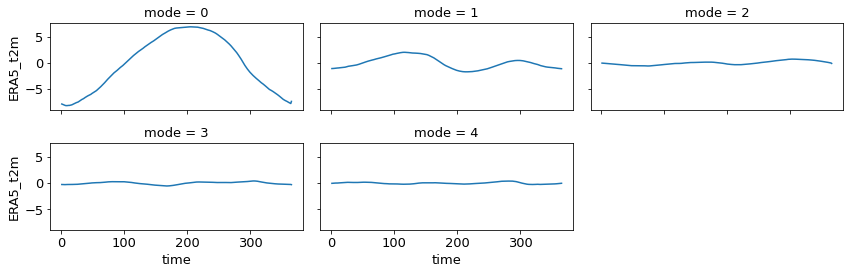

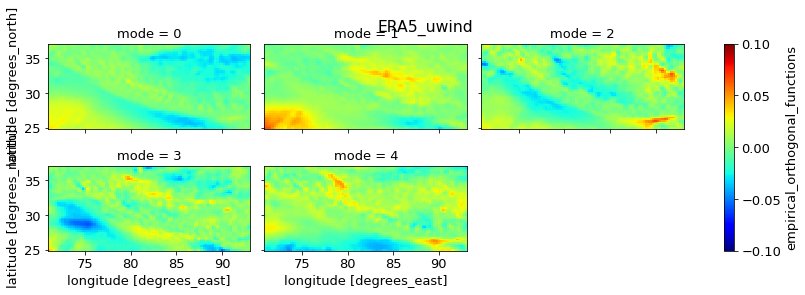

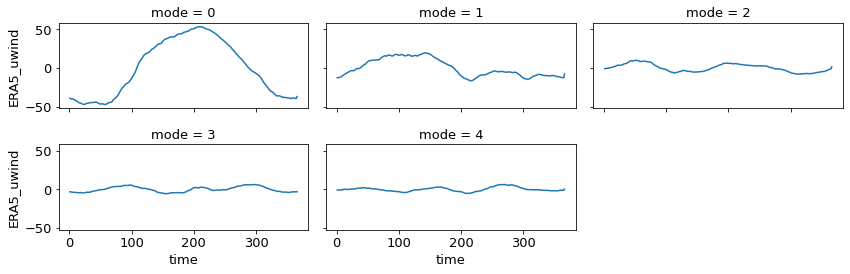

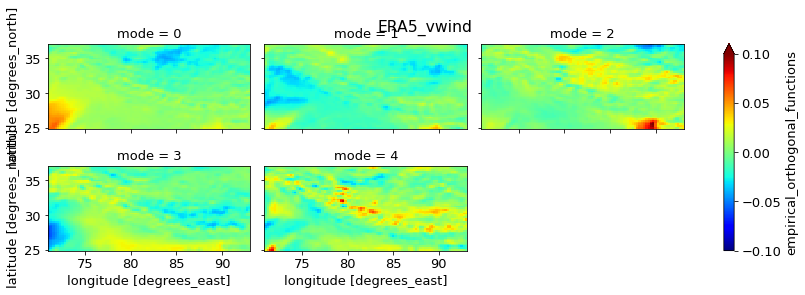

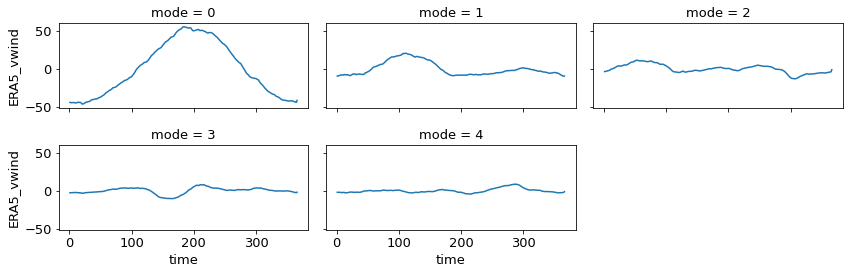

In [282]:
# Computing eofs and pcs for doy dataset
eof_database_doy, pc_database_doy, exp_databas_doy, solver_list_doy = eof_base_interface(dataset_doy, dataset_names, 'EOF.json') 

for i in range(len(dataset_names)):
    getattr(eof_database_doy,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3, vmin = -0.1, vmax = 0.1, cmap = 'jet')
    plt.suptitle(f'{dataset_names[i]}')
    getattr(pc_database_doy,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3)


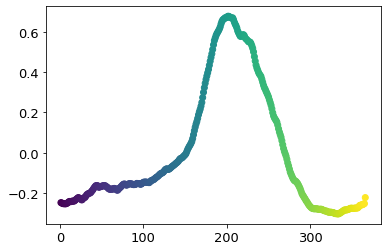

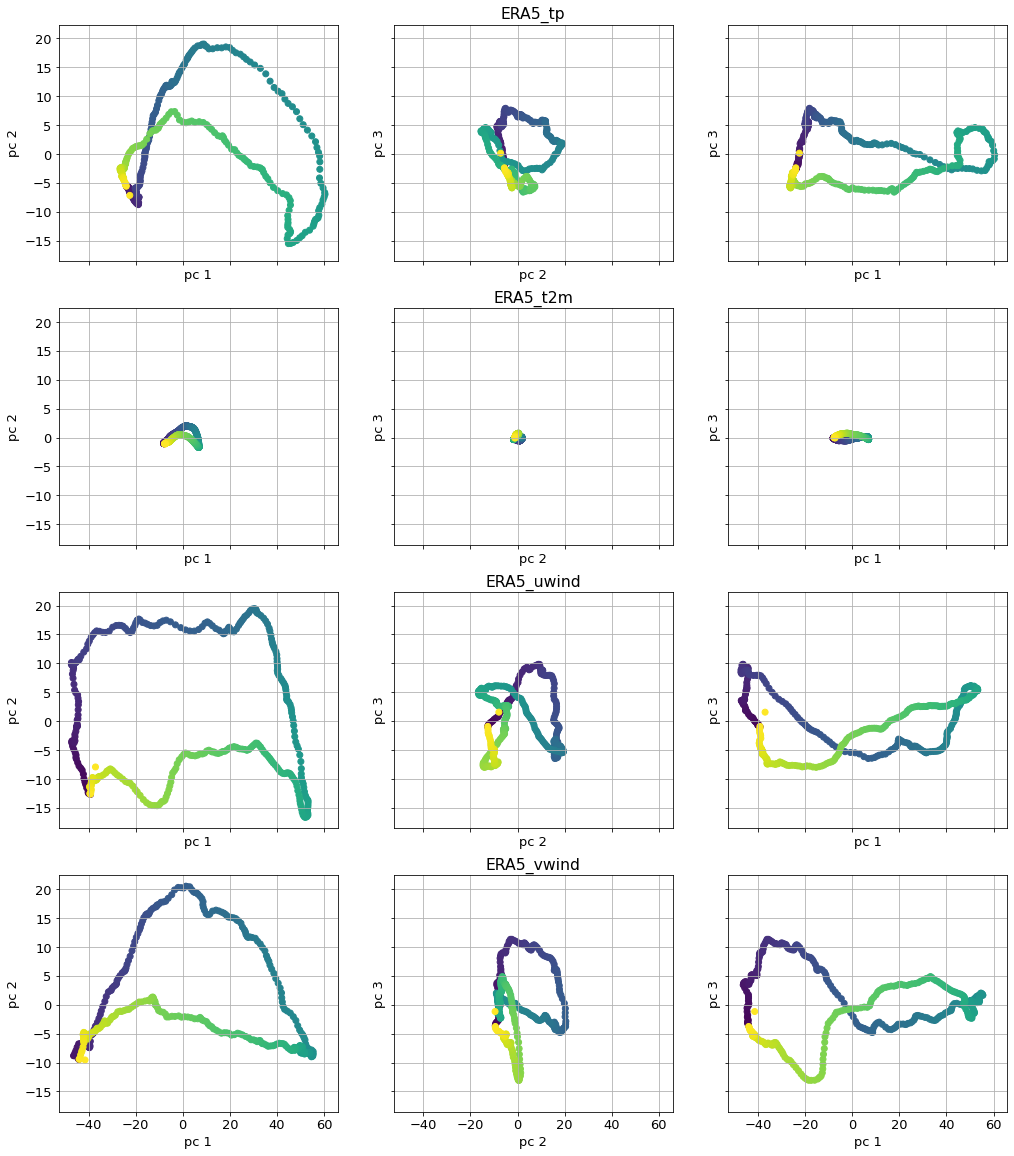

In [283]:
plt.scatter(dataset_doy.time, dataset_doy.ERA5_tp.mean(['lat','lon']), c = dataset_doy.time)  


fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 0) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 1) , c = pc_database_doy.time)
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 1) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 2), c = pc_database_doy.time)
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 0) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 2), c = pc_database_doy.time)
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()


    

### Daily serie

Focus on 1989 monsoon

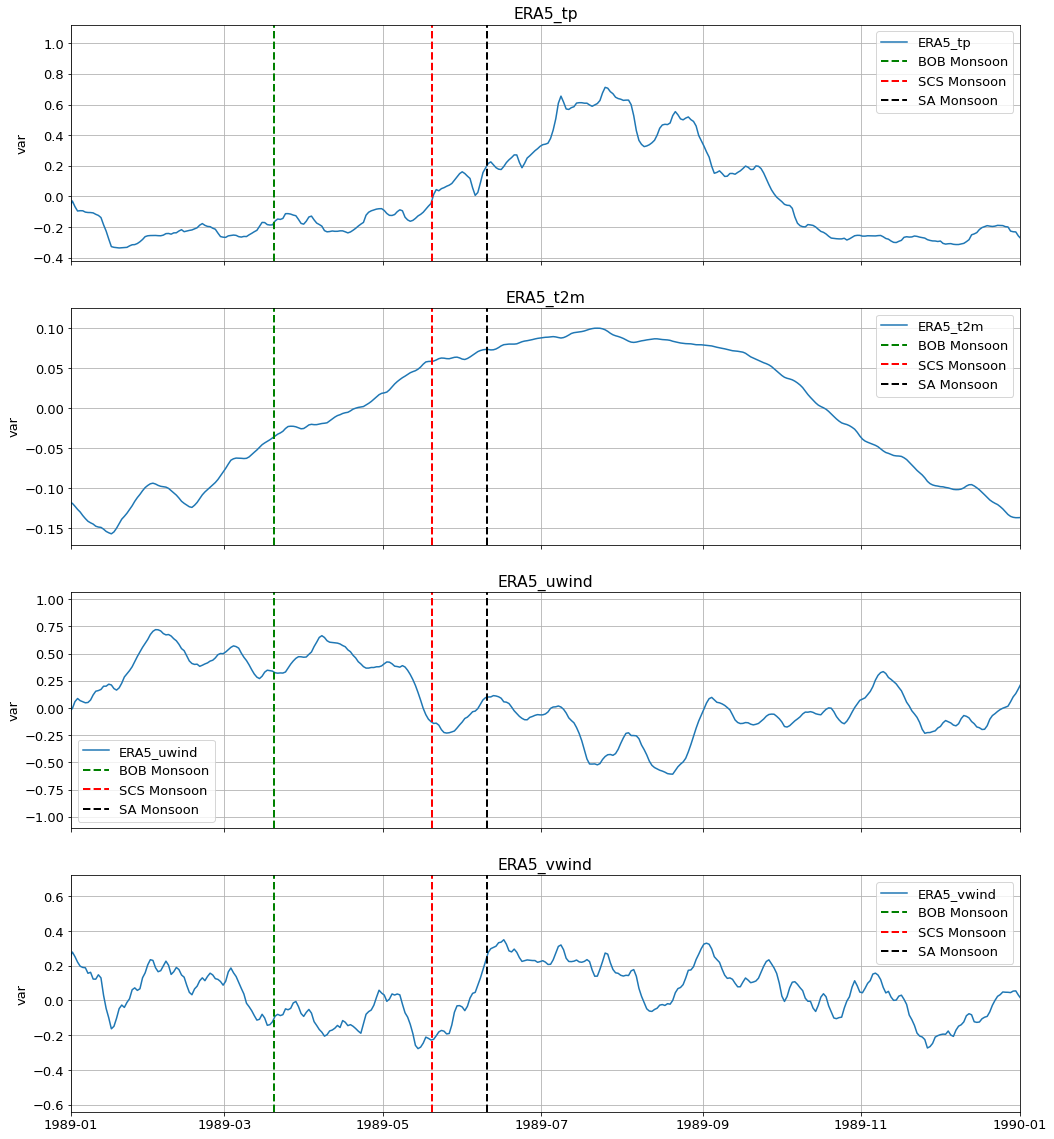

In [284]:
fig, axs = plt.subplots(len(dataset_names),1, figsize = (17,len(dataset_names)*5), sharex = True, sharey = False)

for i in range(len(dataset_names)):
    axs[i].set_title(dataset_names[i])    
    axs[i].plot(getattr(dataset,dataset_names[i]).time, getattr(dataset,dataset_names[i]).mean(['lat','lon']), label = dataset_names[i] )
    axs[i].grid()
    axs[i].set_ylabel('var')
    axs[i].axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    axs[i].axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    axs[i].axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    axs[i].set_xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1990-01-01'))
    axs[i].legend()


In [285]:
# Computing eofs and pcs for daily dataset
#pc_database = eof_proj_interface(solver_list_doy, dataset, dataset_names, 'EOF.json')
eof_database, pc_database, exp_databas, solver_list = eof_base_interface(dataset, dataset_names, 'EOF.json') 

for i in range(len(dataset_names)):
    plt.title(f'{dataset_names[i]}')
    getattr(pc_database,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3, sharey = False)
    plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1990-01-01'))

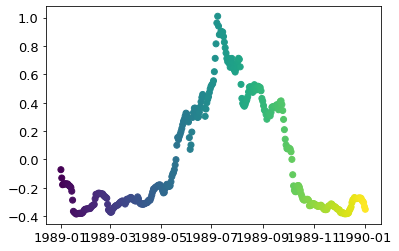

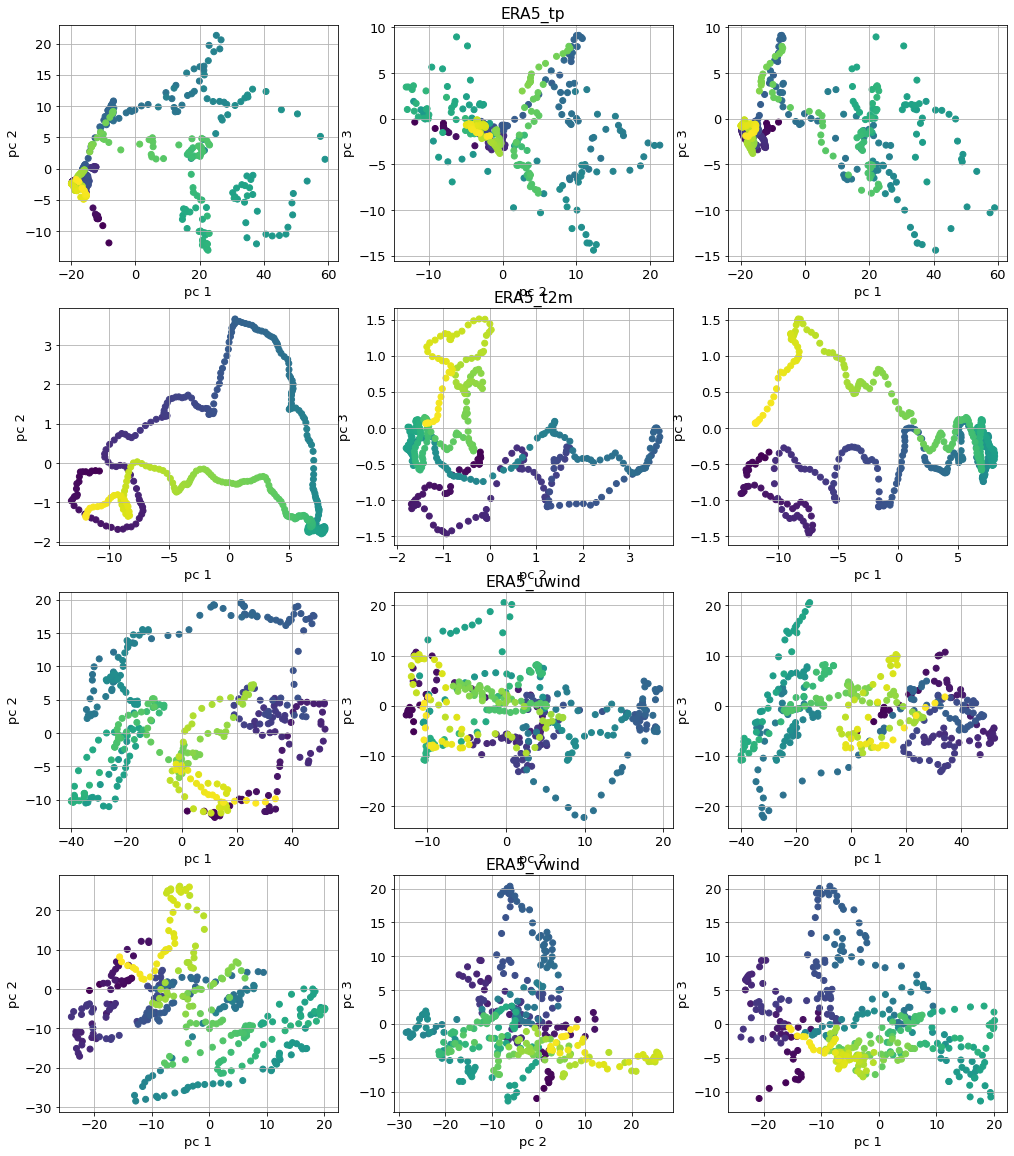

In [ ]:
plot_set = pc_database.sel(time = slice('1989-01-01','1990-01-01'))
plot_setti = dataset.sel(time = slice('1989-01-01','1990-01-01'))
plt.scatter(plot_setti.time, plot_setti.ERA5_tp.mean(['lat','lon']), c = plot_setti.time)  

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = False, sharey = False)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 1), c = plot_set.time)
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 1) , getattr( plot_set,dataset_names[i]).sel(mode = 2), c = plot_set.time)
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 2), c = plot_set.time)
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()

In [ ]:
g = np.concatenate( (pc_database.ERA5_tp.to_numpy(), pc_database.ERA5_uwind.to_numpy(), pc_database.ERA5_vwind.to_numpy(), pc_database.ERA5_t2m.to_numpy()), axis = 1 )

pc_to_fit = xr.DataArray(g).rename('total_pc').rename({'dim_0': 'time','dim_1': 'modes'})
pc_to_fit1 = xr.DataArray(g).rename('total_pc_1').rename({'dim_0': 'time','dim_1': 'modes'})
pc_database_new = xr.merge([pc_database, pc_to_fit, pc_to_fit1]) 

for i in range(len(dataset_names)):
    pc_database_new = pc_database_new.drop(dataset_names[i])

pc_database_new = pc_database_new.rename({'modes': 'mode'})
pc_database_new = pc_database_new.drop('mode')
dataset_names = ['total_pc', 'total_pc_1']

In [ ]:
n_season = 4

model_list, cc_database = kmean_models_dataset(pc_database_new, dataset_names, n_season, 300)
predict_database = kmean_prediction_dataset(pc_database_new, dataset_names, model_list)

<Figure size 1080x360 with 0 Axes>

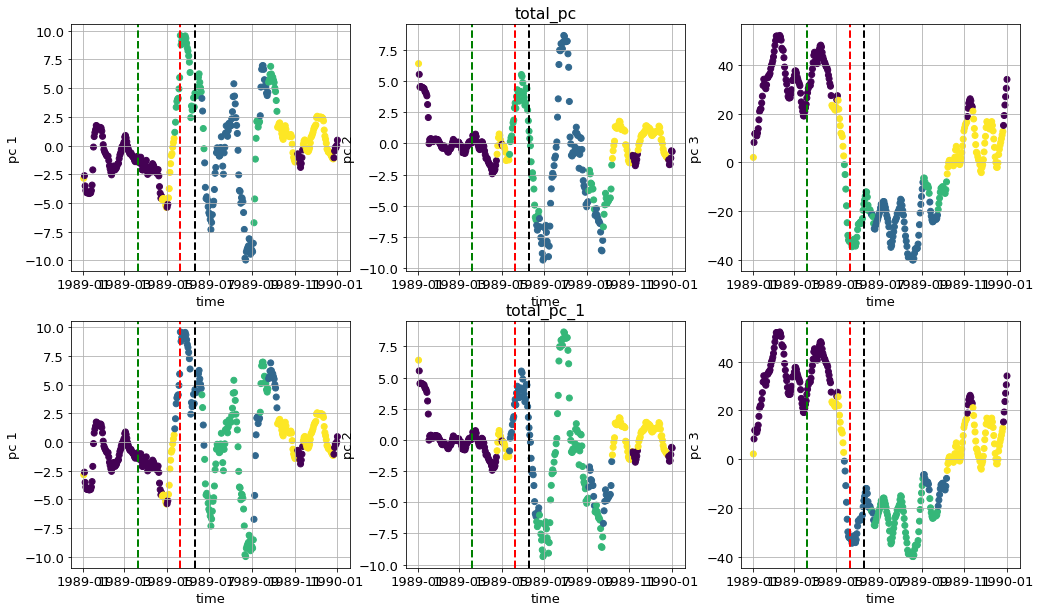

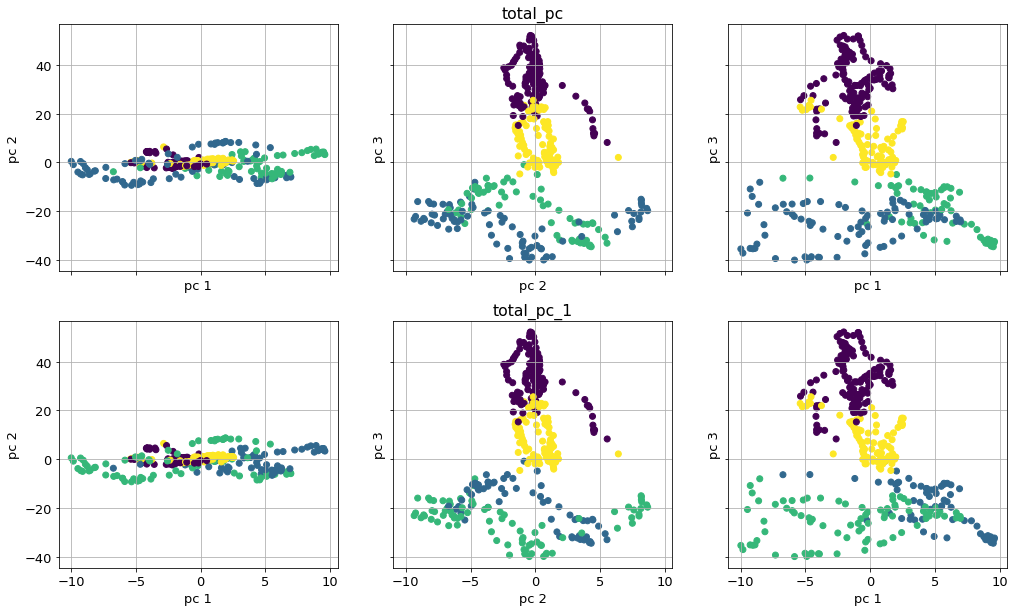

In [ ]:
plot_set = predict_database.sel(time = slice('1989-01-01','1990-01-01'))

plt.figure(figsize = (15,5))
#plt.scatter(plot_setti.time, plot_setti.ERA5_tp.mean(['lat','lon']), c = getattr(plot_set, f'prediction_{dataset_names[i]}'))

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = False, sharey = False)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 0), c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,0].set_xlabel('time')
    axs[i,0].set_ylabel('pc 1')
    axs[i,0].axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    axs[i,0].axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    axs[i,0].axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    axs[i,0].grid() 
    axs[i,1].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 1),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,1].set_xlabel('time')
    axs[i,1].set_ylabel('pc 2')
    axs[i,1].axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    axs[i,1].axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    axs[i,1].axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    axs[i,1].grid()  
    axs[i,2].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,2].set_xlabel('time')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    axs[i,2].axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    axs[i,2].axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    axs[i,2].grid()

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 1), c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 1) , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()

In [ ]:
st_yr = 1980
end_yr = 2011

#onset_paper = [146,147,169,155,146,151,151,150,148,164,152,150,148,163,151,148,155,153,145,154,139,153,156,148,148,159,154,160,153,145,151,146,160,164,155,158,146,148,151,143,151]
onset_paper = [152,150,148,163,151,148,155,153,145,154,139,153,156,148,148,159,154,160,153,145,151,146,160,164,155,158,146,148,151,143,151]

onset_date = np.empty((len(dataset_names),end_yr-st_yr,n_season))
season_len = np.empty((len(dataset_names),end_yr-st_yr,n_season))

by_year = predict_database.groupby('time.year')

for i in range(len(dataset_names)):

    k = 0

    for j in np.arange(st_yr,end_yr,1):

        for y in range(n_season):

            supp = np.squeeze(np.where(getattr(by_year[j],f'prediction_{dataset_names[i]}') == y))

            onset_date[i][k][y] = supp[0]
            season_len[i][k][y] = len(supp)

        k = k+1

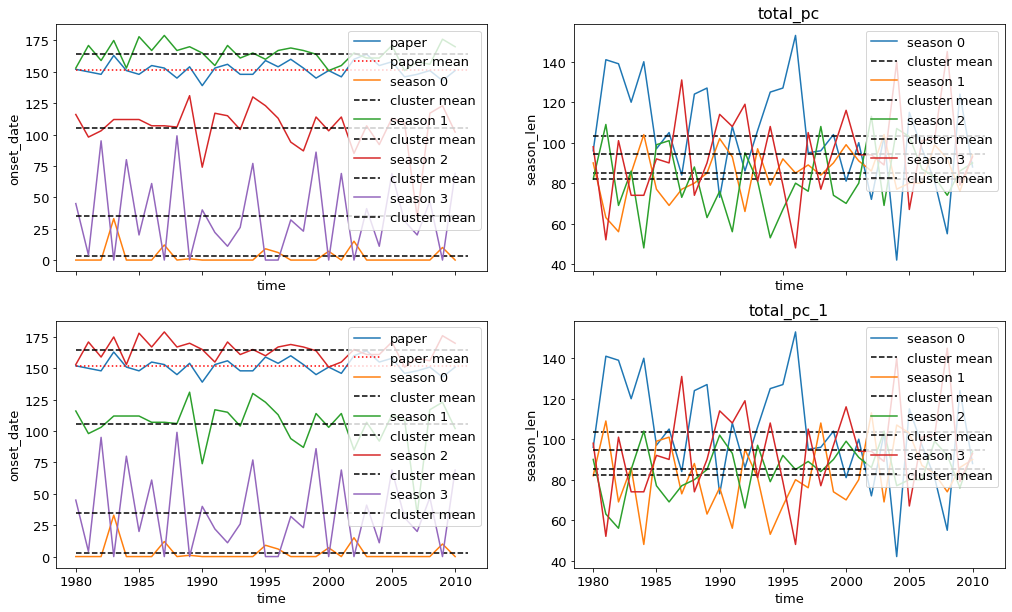

In [ ]:
fig, axs = plt.subplots(len(dataset_names),2, figsize = (17,len(dataset_names)*5), sharex = True, sharey = False)

for i in range(len(dataset_names)):

    axs[i,0].plot(np.arange(st_yr,end_yr,1), onset_paper, label = f'paper')
    axs[i,0].hlines(np.mean(onset_paper), xmin=st_yr, xmax = end_yr, color='r', linestyle=':', label='paper mean')

    for j in range(n_season):

        axs[i,1].set_title(dataset_names[i])    
        axs[i,0].plot(np.arange(st_yr,end_yr,1), onset_date[i,:,j], label = f'season {j}')
        axs[i,0].hlines(np.mean(onset_date[i,:,j]), xmin=st_yr, xmax = end_yr, color='k', linestyle='--', label='cluster mean')
        axs[i,0].set_xlabel('time')
        axs[i,0].set_ylabel('onset_date')
        axs[i,0].grid() 
        axs[i,0].legend() 
        axs[i,1].plot(np.arange(st_yr,end_yr,1), season_len[i,:,j], label = f'season {j}')
        axs[i,1].hlines(np.mean(season_len[i,:,j]), xmin=st_yr, xmax = end_yr, color='k', linestyle='--', label='cluster mean')
        axs[i,1].set_xlabel('time')
        axs[i,1].set_ylabel('season_len')
        axs[i,1].grid()
        axs[i,1].legend()   



In [ ]:
for j in range(n_season):

    print(f'Season {j} - Correlation ')
    a = np.corrcoef(onset_date[0,:,j],onset_paper)
    print(a[0,1])
    print(f'Season {j} - Mean error ')
    print(np.mean(np.abs(onset_date[0,:,j] - onset_paper)))
    print()

Season 0 - Correlation 
0.40146946629417624
Season 0 - Mean error 
148.83870967741936

Season 1 - Correlation 
0.14462211406108227
Season 1 - Mean error 
12.580645161290322

Season 2 - Correlation 
0.11283074173025558
Season 2 - Mean error 
46.225806451612904

Season 3 - Correlation 
-0.33981912278392007
Season 3 - Mean error 
117.06451612903226



In [ ]:
onset = [146,147,169,155,146,151,151,150,148,164,152,150,148,163,151,148,155,153,145,154,139,153,156,148,148,159,154,160,153,145,151,146,160,164,155,158,146,148,151,143,151]

In [ ]:
np.mean(onset_date[0,:,0])

3.0

In [ ]:
np.mean(onset_paper)

151.83870967741936

In [ ]:
predict_database

<xarray.Dataset>
Dimensions:                (time: 14900, mode: 20)
Coordinates:
  * time                   (time) datetime64[ns] 1979-02-08T12:00:00 ... 2019...
Dimensions without coordinates: mode
Data variables:
    prediction_total_pc    (time) int32 3 3 3 3 3 3 3 0 0 ... 0 0 0 0 0 0 0 0 0
    prediction_total_pc_1  (time) int32 3 3 3 3 3 3 3 0 0 ... 0 0 0 0 0 0 0 0 0
    total_pc               (time, mode) float64 -14.12 -5.06 ... 0.2604 -0.7999
    total_pc_1             (time, mode) float64 -14.12 -5.06 ... 0.2604 -0.7999

/tmp/ipykernel_495401/1893521346.py:22: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im0)


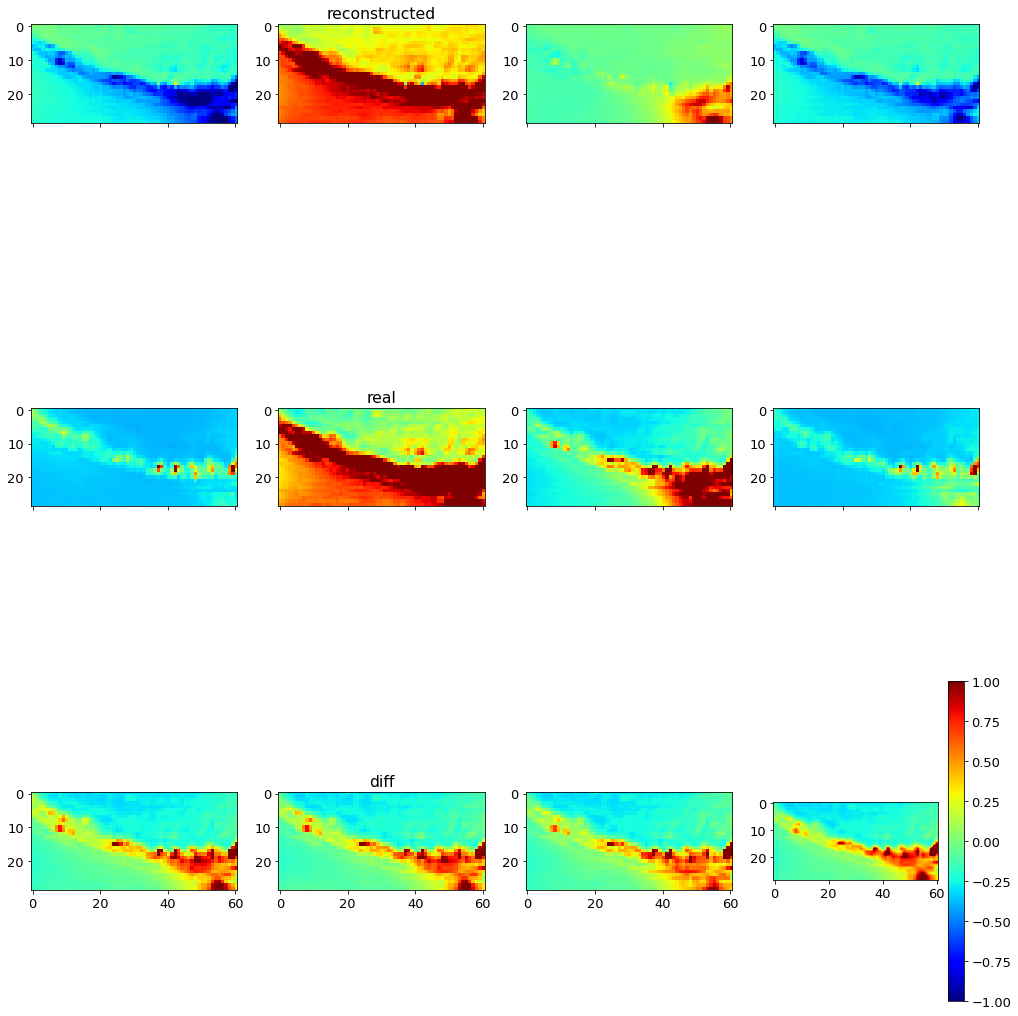

In [ ]:
fig, axs = plt.subplots(3,n_season, figsize = (17,n_season*5), sharex = True, sharey = False)

for i in range(n_season):

    a = eof_database.ERA5_tp.sel(mode=0)*cc_database.cc_total_pc.sel(dim_0=i).sel(dim_1=0)
    b = eof_database.ERA5_tp.sel(mode=1)*cc_database.cc_total_pc.sel(dim_0=i).sel(dim_1=1)
    c = eof_database.ERA5_tp.sel(mode=2)*cc_database.cc_total_pc.sel(dim_0=i).sel(dim_1=2)

    tot = a + b + c

    f = dataset.ERA5_tp.where(predict_database.prediction_total_pc==i).dropna('time').mean('time')

    toti = f - tot

    im0 = axs[0,i].imshow(tot, vmin = -1, vmax = 1, cmap = 'jet')
    axs[0,1].set_title('reconstructed')
    im1 = axs[1,i].imshow(f, vmin = -1, vmax = 1, cmap = 'jet')
    axs[1,1].set_title('real')
    im2 = axs[2,i].imshow(toti, vmin = -1, vmax = 1, cmap = 'jet')
    axs[2,1].set_title('diff')
    
fig.colorbar(im0)

In [ ]:
cc_database

<xarray.Dataset>
Dimensions:        (dim_0: 4, dim_1: 20)
Dimensions without coordinates: dim_0, dim_1
Data variables:
    cc_total_pc    (dim_0, dim_1) float64 -16.12 -2.471 ... -0.1834 -0.09888
    cc_total_pc_1  (dim_0, dim_1) float64 -16.12 -2.471 ... -0.1834 -0.09888